### Accurate Extraction, and Health Insights with Amazon HealthLake

In [1]:
import boto3
import json
import boto3
import re
import csv
import sagemaker
from sagemaker import get_execution_role
from sagemaker.s3 import S3Uploader, S3Downloader
import uuid
import time
import io
from io import BytesIO
import sys
from pprint import pprint

from IPython.display import Image, display
from PIL import Image as PImage, ImageDraw

In [2]:
import boto3
import requests
import argparse
import json



client = boto3.client('healthlake')

### HL Put request

In [3]:
# Parse the input arguments

data_store_endpoint = "https://healthlake.us-east-1.amazonaws.com/datastore/704f883781fabb8e2aacf09a644e074b/r4/"
resource_path = "Patient/3cedeb4b-a9b8-41d2-aef2-de4c0413ec95"
request_body_file = "put_file.json"
region = "us-east-1"

# Frame the resource endpoint
resource_endpoint = data_store_endpoint+resource_path


In [4]:
session = boto3.session.Session(region_name=region)
client = session.client("healthlake")


In [8]:
!pip install requests-auth-aws-sigv4
from requests_auth_aws_sigv4 import AWSSigV4
# Frame authorization
auth = AWSSigV4("healthlake", session=session)

# Read the request body from input file
with open(request_body_file) as json_body:
    json_data = json.load(json_body)

# Calling data store FHIR endpoint using SigV4 auth
r = requests.put(resource_endpoint, json=json_data, auth=auth)
print(r.json())

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
{'id': '3cedeb4b-a9b8-41d2-aef2-de4c0413ec95', 'resourceType': 'Patient', 'active': True, 'name': [{'use': 'official', 'family': 'Dee', 'given': ['Jane']}, {'use': 'usual', 'given': ['Jane']}], 'gender': 'female', 'birthDate': '1966-09-01', 'meta': {'lastUpdated': '2022-09-23T04:43:25.879Z'}}


### HL Get Request

In [9]:
data_store_endpoint = "https://healthlake.us-east-1.amazonaws.com/datastore/704f883781fabb8e2aacf09a644e074b/r4/"
resource_path = "Patient/3cedeb4b-a9b8-41d2-aef2-de4c0413ec95"
region = "us-east-1"

# Frame the resource endpoint
resource_endpoint = data_store_endpoint+resource_path


In [10]:
# Frame authorization
auth = AWSSigV4("healthlake", session=session)

# Calling data store FHIR endpoint using SigV4 auth
r = requests.get(resource_endpoint, auth=auth)
print(r.json())

{'id': '3cedeb4b-a9b8-41d2-aef2-de4c0413ec95', 'resourceType': 'Patient', 'active': True, 'name': [{'use': 'official', 'family': 'Dee', 'given': ['Jane']}, {'use': 'usual', 'given': ['Jane']}], 'gender': 'female', 'birthDate': '1966-09-01', 'meta': {'lastUpdated': '2022-09-23T04:43:25.879Z'}}


### HL POST Request

In [11]:
data_store_endpoint = "https://healthlake.us-east-1.amazonaws.com/datastore/704f883781fabb8e2aacf09a644e074b/r4/"
resource_path = "Patient/3cedeb4b-a9b8-41d2-aef2-de4c0413ec95"
request_body_file = "post_json1.json"
region = "us-east-1"
#Frame the resource endpoint
resource_endpoint = data_store_endpoint+resource_path

In [12]:
# Frame authorization
auth = AWSSigV4("healthlake", session=session)

# Read the request body from input file
with open(request_body_file) as json_body:
    json_data = json.load(json_body)

# Calling data store FHIR endpoint using SigV4 auth
r = requests.post(resource_endpoint, json=json_data, auth=auth)
print(r)

# Calling data store FHIR endpoint using SigV4 auth
r = requests.get(resource_endpoint, auth=auth)
print(r.json())

<Response [200]>
{'id': '3cedeb4b-a9b8-41d2-aef2-de4c0413ec95', 'resourceType': 'Patient', 'active': True, 'name': [{'use': 'official', 'family': 'Dee', 'given': ['Jane']}, {'use': 'usual', 'given': ['Jane']}], 'gender': 'female', 'birthDate': '1966-09-01', 'meta': {'lastUpdated': '2022-09-23T04:43:25.879Z'}}


### HL Delete Request

In [13]:
# Calling data store FHIR endpoint using SigV4 auth
r = requests.delete(resource_endpoint, auth=auth)

# HTTP Response code should be 204 once the resource is successfully deleted
print(r)

<Response [204]>


### HL Doc Reference

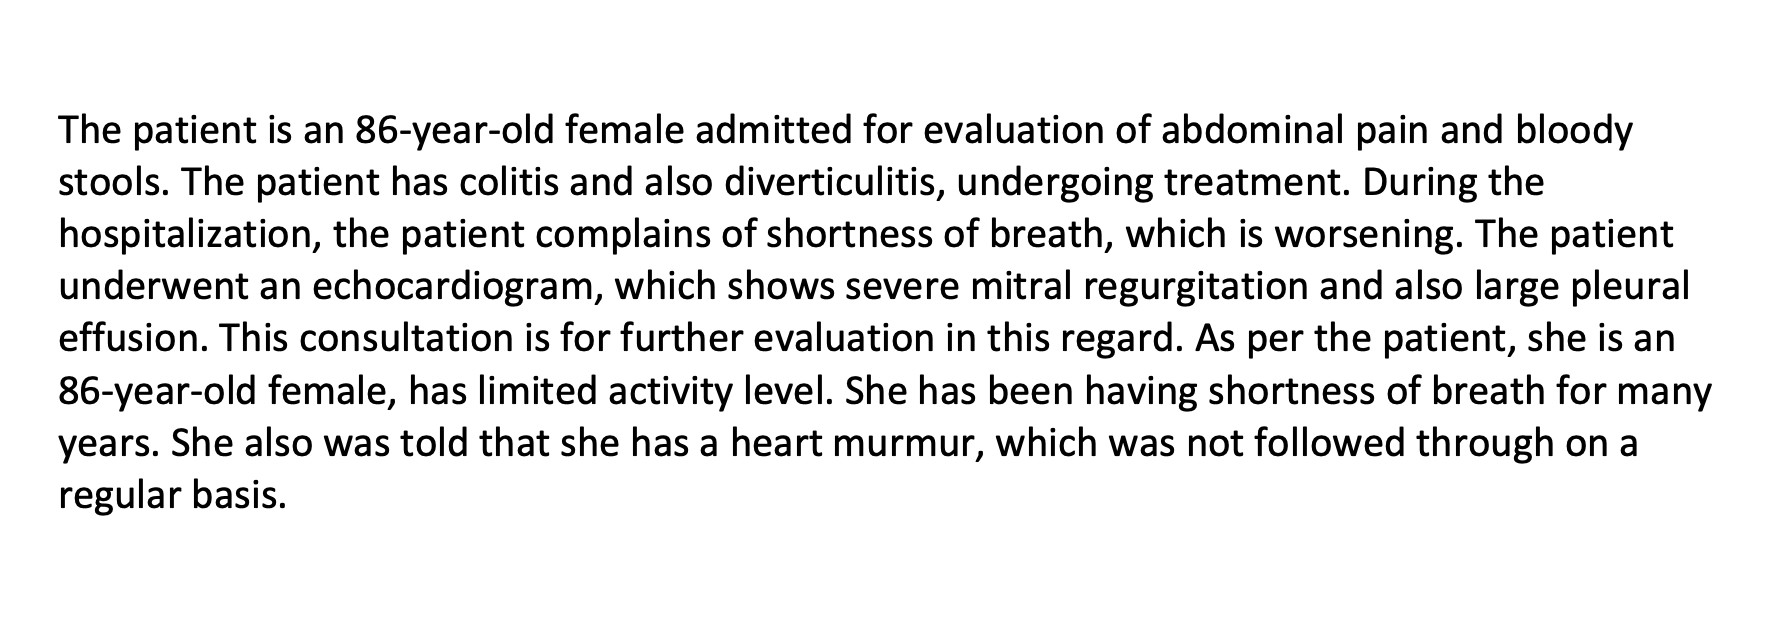

In [15]:
# Document

documentName = "doctornotes1.png"

display(Image(filename=documentName))

In [16]:
# process using image bytes
def calltextract(documentName): 
    client = boto3.client(service_name='textract',
         region_name= 'us-east-1',
         endpoint_url='https://textract.us-east-1.amazonaws.com')

    with open(documentName, 'rb') as file:
            img_test = file.read()
            bytes_test = bytearray(img_test)
            print('Image loaded', documentName)

    # process using image bytes
    response = client.analyze_document(Document={'Bytes': bytes_test}, FeatureTypes=['FORMS'])

    return response

In [17]:
response= calltextract(documentName)
print(response)

Image loaded doctornotes1.png
{'DocumentMetadata': {'Pages': 1}, 'Blocks': [{'BlockType': 'PAGE', 'Geometry': {'BoundingBox': {'Width': 1.0, 'Height': 1.0, 'Left': 0.0, 'Top': 0.0}, 'Polygon': [{'X': 0.0, 'Y': 3.97788971895352e-05}, {'X': 0.9999349117279053, 'Y': 0.0}, {'X': 1.0, 'Y': 1.0}, {'X': 0.0004315438854973763, 'Y': 1.0}]}, 'Id': 'd139c3a0-dfeb-433c-8754-d7640ad0cf5f', 'Relationships': [{'Type': 'CHILD', 'Ids': ['8a27181e-c161-4bbd-9ea1-2af8ddf1955d', 'b9e9c9ac-5db5-4859-a2fe-fbf2f3ba3abf', 'ad44daf9-6865-468b-935a-2fc50a83319d', '4855746b-cd68-4e51-9c53-36077608079d', 'e38a08c1-a6e0-4f76-9b71-5cc144b65ad1', 'de4ba84c-acbd-4496-b634-c4c80740f2ec', '7e429190-52d5-4a71-aeb9-f9fe4155280a', '8070dffa-e69b-4e1e-b6ef-6de5993bca90']}]}, {'BlockType': 'LINE', 'Confidence': 99.9679946899414, 'Text': 'The patient is an 86-year-old female admitted for evaluation of abdominal pain and bloody', 'Geometry': {'BoundingBox': {'Width': 0.8848024606704712, 'Height': 0.06508300453424454, 'Left': 

In [18]:
# Print detected text
text = ""       
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        text = text + " " + item["Text"]
        
        
print(text)

 The patient is an 86-year-old female admitted for evaluation of abdominal pain and bloody stools. The patient has colitis and also diverticulitis, undergoing treatment. During the hospitalization, the patient complains of shortness of breath, which is worsening. The patient underwent an echocardiogram, which shows severe mitral regurgitation and also large pleural effusion. This consultation is for further evaluation in this regard. As per the patient, she is an 86-year-old female, has limited activity level. She has been having shortness of breath for many years. She also was told that she has a heart murmur, which was not followed through on a regular basis.


In [19]:
#convert to base64
import base64
sample_string_bytes = text.encode("ascii")
  
base64_bytes = base64.b64encode(sample_string_bytes)
print(base64_bytes)
base64_string = base64_bytes.decode("ascii")
  
print(f"Encoded string: {base64_string}")

b'IFRoZSBwYXRpZW50IGlzIGFuIDg2LXllYXItb2xkIGZlbWFsZSBhZG1pdHRlZCBmb3IgZXZhbHVhdGlvbiBvZiBhYmRvbWluYWwgcGFpbiBhbmQgYmxvb2R5IHN0b29scy4gVGhlIHBhdGllbnQgaGFzIGNvbGl0aXMgYW5kIGFsc28gZGl2ZXJ0aWN1bGl0aXMsIHVuZGVyZ29pbmcgdHJlYXRtZW50LiBEdXJpbmcgdGhlIGhvc3BpdGFsaXphdGlvbiwgdGhlIHBhdGllbnQgY29tcGxhaW5zIG9mIHNob3J0bmVzcyBvZiBicmVhdGgsIHdoaWNoIGlzIHdvcnNlbmluZy4gVGhlIHBhdGllbnQgdW5kZXJ3ZW50IGFuIGVjaG9jYXJkaW9ncmFtLCB3aGljaCBzaG93cyBzZXZlcmUgbWl0cmFsIHJlZ3VyZ2l0YXRpb24gYW5kIGFsc28gbGFyZ2UgcGxldXJhbCBlZmZ1c2lvbi4gVGhpcyBjb25zdWx0YXRpb24gaXMgZm9yIGZ1cnRoZXIgZXZhbHVhdGlvbiBpbiB0aGlzIHJlZ2FyZC4gQXMgcGVyIHRoZSBwYXRpZW50LCBzaGUgaXMgYW4gODYteWVhci1vbGQgZmVtYWxlLCBoYXMgbGltaXRlZCBhY3Rpdml0eSBsZXZlbC4gU2hlIGhhcyBiZWVuIGhhdmluZyBzaG9ydG5lc3Mgb2YgYnJlYXRoIGZvciBtYW55IHllYXJzLiBTaGUgYWxzbyB3YXMgdG9sZCB0aGF0IHNoZSBoYXMgYSBoZWFydCBtdXJtdXIsIHdoaWNoIHdhcyBub3QgZm9sbG93ZWQgdGhyb3VnaCBvbiBhIHJlZ3VsYXIgYmFzaXMu'
Encoded string: IFRoZSBwYXRpZW50IGlzIGFuIDg2LXllYXItb2xkIGZlbWFsZSBhZG1pdHRlZCBmb3IgZXZhbHVhdGlvbiBvZiBh

In [20]:
import json
json_docref = '{"resourceType":"DocumentReference","id":"id12345","meta":{"profile":["http://hl7.org/fhir/us/core/StructureDefinition/us-core-documentreference"]},"identifier":[{"system":"urn:ietf:rfc:3986","value":"urn:uuid:f11b9b48-ff6b-a62b-8425-037ea9c2d826"}],"status":"current","type":{"coding":[{"system":"http://loinc.org","code":"34117-2","display":"History and physical note"},{"system":"http://loinc.org","code":"51847-2","display":"Evaluation+Plan note"}]},"category":[{"coding":[{"system":"http://hl7.org/fhir/us/core/CodeSystem/us-core-documentreference-category","code":"clinical-note","display":"Clinical Note"}]}],"subject":{"reference":"Patient/patientid12345"},"date":"2022-04-13T05:07:38.982+00:00","author":[{"reference":"Practitioner?identifier=http://hl7.org/fhir/sid/us-npi|9999990259","display":"Dr. Tandra334 Carter549"}],"custodian":{"reference":"Organization?identifier=https://ocktank.com/synthetic/synthea|f7ae497d-8dc6-3721-9402-43b621a4e7d2","display":"PCP14023"},"content":[{"attachment":{"contentType":"text/plain; charset=utf-8","data":"IFRoZSBwYXRpZW50IGlzIGFuIDg2LXllYXItb2xkIGZlbWFsZSBhZG1pdHRlZCBmb3IgZXZhbHVhdGlvbiBvZiBhYmRvbWluYWwgcGFpbiBhbmQgYmxvb2R5IHN0b29scy4gVGhlIHBhdGllbnQgaGFzIGNvbGl0aXMgYW5kIGFsc28gZGl2ZXJ0aWN1bGl0aXMsIHVuZGVyZ29pbmcgdHJlYXRtZW50LiBEdXJpbmcgdGhlIGhvc3BpdGFsaXphdGlvbiwgdGhlIHBhdGllbnQgY29tcGxhaW5zIG9mIHNob3J0bmVzcyBvZiBicmVhdGgsIHdoaWNoIGlzIHdvcnNlbmluZy4gVGhlIHBhdGllbnQgdW5kZXJ3ZW50IGFuIGVjaG9jYXJkaW9ncmFtLCB3aGljaCBzaG93cyBzZXZlcmUgbWl0cmFsIHJlZ3VyZ2l0YXRpb24gYW5kIGFsc28gbGFyZ2UgcGxldXJhbCBlZmZ1c2lvbi4gVGhpcyBjb25zdWx0YXRpb24gaXMgZm9yIGZ1cnRoZXIgZXZhbHVhdGlvbiBpbiB0aGlzIHJlZ2FyZC4gQXMgcGVyIHRoZSBwYXRpZW50LCBzaGUgaXMgYW4gODYteWVhci1vbGQgZmVtYWxlLCBoYXMgbGltaXRlZCBhY3Rpdml0eSBsZXZlbC4gU2hlIGhhcyBiZWVuIGhhdmluZyBzaG9ydG5lc3Mgb2YgYnJlYXRoIGZvciBtYW55IHllYXJzLiBTaGUgYWxzbyB3YXMgdG9sZCB0aGF0IHNoZSBoYXMgYSBoZWFydCBtdXJtdXIsIHdoaWNoIHdhcyBub3QgZm9sbG93ZWQgdGhyb3VnaCBvbiBhIHJlZ3VsYXIgYmFzaXMu"},"format":{"system":"http://ihe.net/fhir/ValueSet/IHE.FormatCode.codesystem","code":"urn:ihe:iti:xds:2017:mimeTypeSufficient","display":"mimeType Sufficient"}}],"context":{"encounter":[{"reference":"Encounter/98309c16-75dd-8780-4bab-2d2788f7f885"}],"period":{"start":"2022-04-13T05:07:38+00:00","end":"2022-04-13T05:22:38+00:00"}}}'

print(json.dumps(json_docref))

"{\"resourceType\":\"DocumentReference\",\"id\":\"id12345\",\"meta\":{\"profile\":[\"http://hl7.org/fhir/us/core/StructureDefinition/us-core-documentreference\"]},\"identifier\":[{\"system\":\"urn:ietf:rfc:3986\",\"value\":\"urn:uuid:f11b9b48-ff6b-a62b-8425-037ea9c2d826\"}],\"status\":\"current\",\"type\":{\"coding\":[{\"system\":\"http://loinc.org\",\"code\":\"34117-2\",\"display\":\"History and physical note\"},{\"system\":\"http://loinc.org\",\"code\":\"51847-2\",\"display\":\"Evaluation+Plan note\"}]},\"category\":[{\"coding\":[{\"system\":\"http://hl7.org/fhir/us/core/CodeSystem/us-core-documentreference-category\",\"code\":\"clinical-note\",\"display\":\"Clinical Note\"}]}],\"subject\":{\"reference\":\"Patient/patientid12345\"},\"date\":\"2022-04-13T05:07:38.982+00:00\",\"author\":[{\"reference\":\"Practitioner?identifier=http://hl7.org/fhir/sid/us-npi|9999990259\",\"display\":\"Dr. Tandra334 Carter549\"}],\"custodian\":{\"reference\":\"Organization?identifier=https://ocktank.com

In [22]:
# Parse the input arguments
request_body_file = "doc_ref.json"
region = "us-east-1"



# Frame the resource endpoint
resource_endpoint = data_store_endpoint+resource_path

resource_endpoint = "https://healthlake.us-east-1.amazonaws.com/datastore/704f883781fabb8e2aacf09a644e074b/r4/DocumentReference/" + "id12345"

!pip install requests-auth-aws-sigv4
from requests_auth_aws_sigv4 import AWSSigV4
# Frame authorization
auth = AWSSigV4("healthlake", session=session)

# Read the request body from input file
with open(request_body_file) as json_body:
    json_data = json.load(json_body)

# Calling data store FHIR endpoint using SigV4 auth
r = requests.put(resource_endpoint, json=json_data, auth=auth)
print(r.json())

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
{'resourceType': 'DocumentReference', 'id': 'id12345', 'meta': {'lastUpdated': '2022-09-23T04:45:44.710Z', 'profile': ['http://hl7.org/fhir/us/core/StructureDefinition/us-core-documentreference']}, 'identifier': [{'system': 'urn:ietf:rfc:3986', 'value': 'urn:uuid:f11b9b48-ff6b-a62b-8425-037ea9c2d826'}], 'status': 'current', 'type': {'coding': [{'system': 'http://loinc.org', 'code': '34117-2', 'display': 'History and physical note'}, {'system': 'http://loinc.org', 'code': '51847-2', 'display': 'Evaluation+Plan note'}]}, 'category': [{'coding': [{'system': 'http://hl7.org/fhir/us/core/CodeSystem/us-core-documentreference-category', 'code': 'clinical-note', 'display': 'Clinical Note'}]}], 'subject': {'reference': 'Patient/3cedeb4b-a9b8-41d2-aef2-de4c0413ec95'}, 'date': '2022-04-13T

## End

Delete the Amazon s3 bucket and the files in the buckethttps://docs.aws.amazon.com/AmazonS3/latest/userguide/delete-bucket.html